# BANK CUSTOMER CHURN 

## PROBLEM STATEMENT

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

## CREATING DATASET

In [4]:
df = pd.read_excel("D:\project 1 bank customer churn\\bank_churn_customer_data.xlsx")
df

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,one,yes,yes,101348.88,yes
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,one,no,yes,112542.58,no
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,three,yes,no,113931.57,yes
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,two,no,no,93826.63,no
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,one,yes,yes,79084.10,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,two,yes,no,96270.64,no
9996,9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,one,yes,yes,101699.77,no
9997,9997,9998,15584532,Liu,709,France,Female,36,7,0.00,one,no,yes,42085.58,yes
9998,9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,two,yes,no,92888.52,yes


## Feature Description:

RowNumber—corresponds to the record (row) number and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.

Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal 
and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.


NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher 
salaries.

Exited—whether or not the customer left the bank.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   RowNumber        10000 non-null  int64  
 2   CustomerId       10000 non-null  int64  
 3   Surname          10000 non-null  object 
 4   CreditScore      10000 non-null  int64  
 5   Geography        10000 non-null  object 
 6   Gender           10000 non-null  object 
 7   Age              10000 non-null  int64  
 8   Tenure           10000 non-null  int64  
 9   Balance          10000 non-null  float64
 10  NumOfProducts    10000 non-null  object 
 11  HasCrCard        10000 non-null  object 
 12  IsActiveMember   10000 non-null  object 
 13  EstimatedSalary  10000 non-null  float64
 14  Exited           10000 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Unnamed: 0,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,2886.89568,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,0.00000,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,2499.75000,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,4999.50000,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,7499.25000,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,9999.00000,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [7]:
df.isna().sum()  # there is no missing value in anyy column.

Unnamed: 0         0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(["RowNumber", "CustomerId", "Surname", "Unnamed: 0"], axis = 1, inplace= True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,one,yes,yes,101348.88,yes
1,608,Spain,Female,41,1,83807.86,one,no,yes,112542.58,no
2,502,France,Female,42,8,159660.80,three,yes,no,113931.57,yes
3,699,France,Female,39,1,0.00,two,no,no,93826.63,no
4,850,Spain,Female,43,2,125510.82,one,yes,yes,79084.10,no
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,two,yes,no,96270.64,no
9996,516,France,Male,35,10,57369.61,one,yes,yes,101699.77,no
9997,709,France,Female,36,7,0.00,one,no,yes,42085.58,yes
9998,772,Germany,Male,42,3,75075.31,two,yes,no,92888.52,yes


## EDA (exploratory data analysis)

### univariate analysis

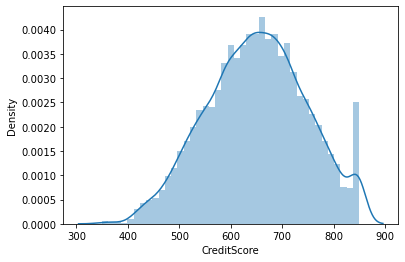

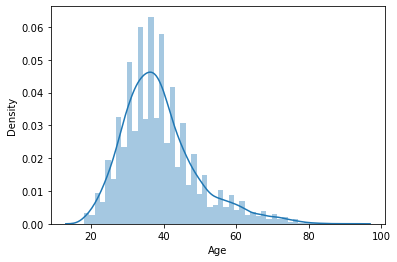

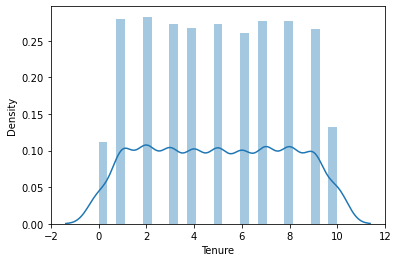

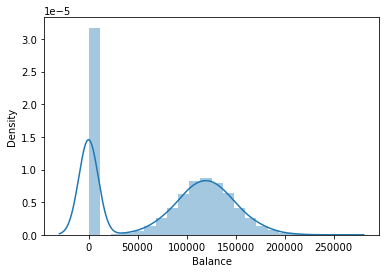

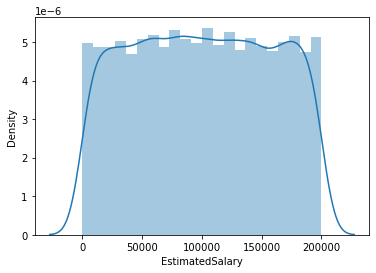

In [9]:
## for numeric data

num_cols = (df.select_dtypes(["int","float"]).columns)
for a in num_cols:
    sns.distplot(df[a])
    plt.show()

In [10]:
## for categorical data

<AxesSubplot:xlabel='Geography', ylabel='count'>

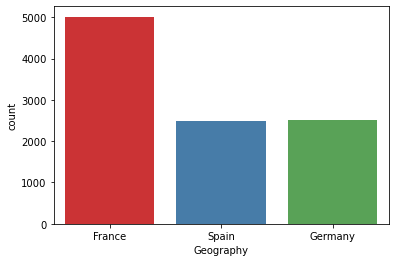

In [11]:
# for geography
sns.countplot(df["Geography"],palette="Set1")

In [12]:
## here it is seen that maximum no of the customers are from france.

<AxesSubplot:xlabel='Gender', ylabel='count'>

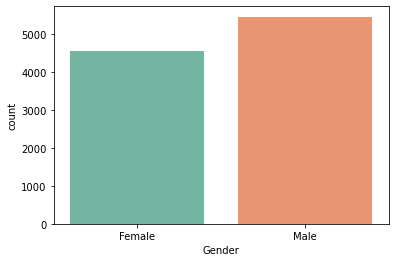

In [13]:
# for gender
sns.countplot(df["Gender"], palette="Set2")

In [14]:
## no of males and females are nearly same, they are balanced.

<function matplotlib.pyplot.show(close=None, block=None)>

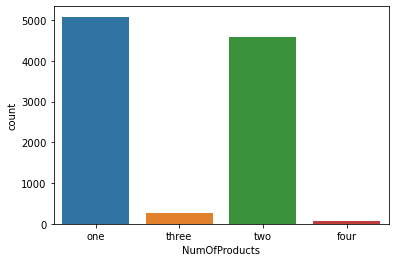

In [15]:
# for num of product used
sns.countplot(df["NumOfProducts"])
plt.show

In [16]:
## maximum people uses product 1 and 2 only.

<AxesSubplot:xlabel='Exited', ylabel='count'>

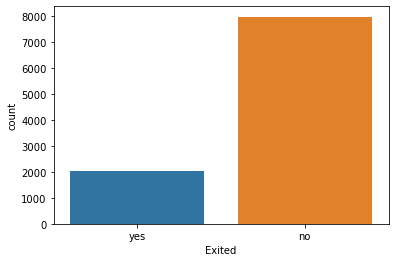

In [17]:
# for exited feature
sns.countplot(df["Exited"])

In [18]:
## this is our target variable it shows that the data is imbalanced

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

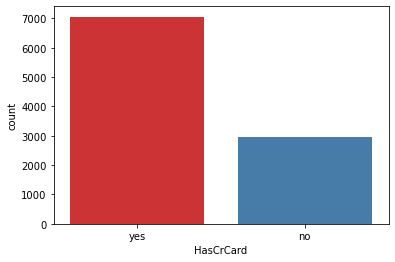

In [19]:
# for HasCrCard
sns.countplot(df["HasCrCard"],palette= "Set1")

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

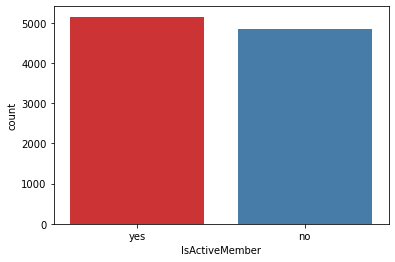

In [20]:
# for active member
sns.countplot(df["IsActiveMember"],palette= "Set1")

## bi-viriate analysis

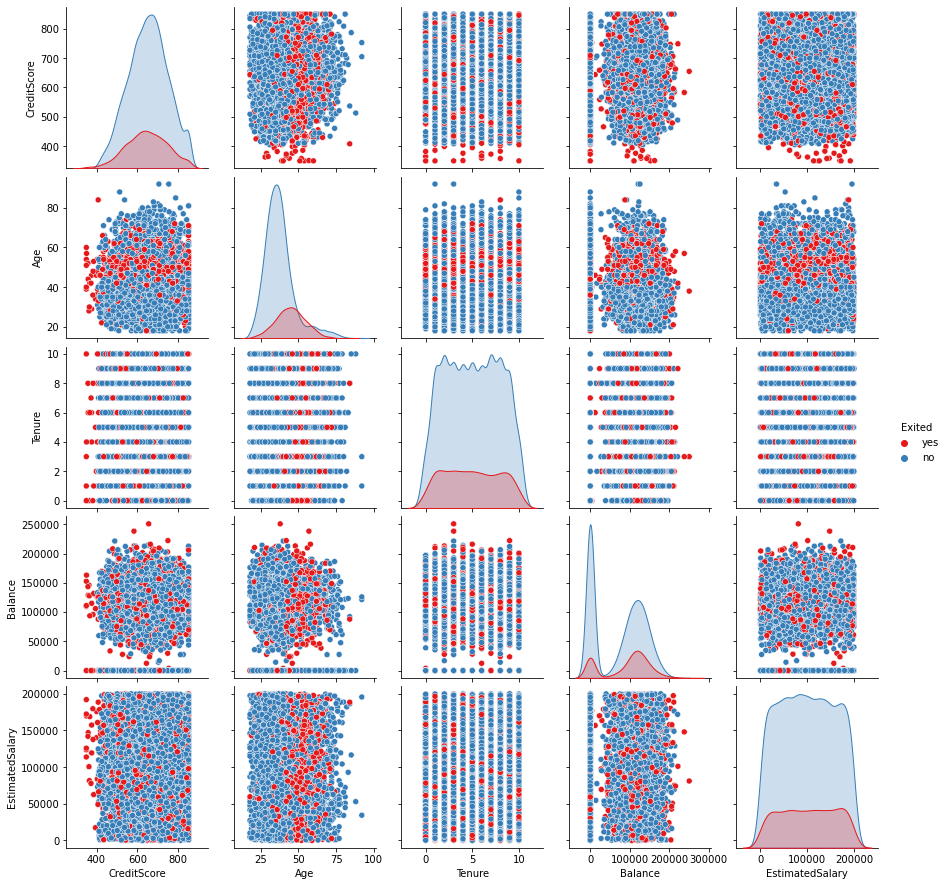

In [21]:
sns.pairplot(df, hue = "Exited",palette = "Set1")

In [22]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')

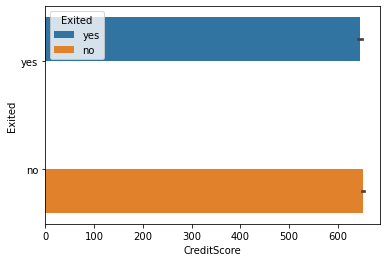

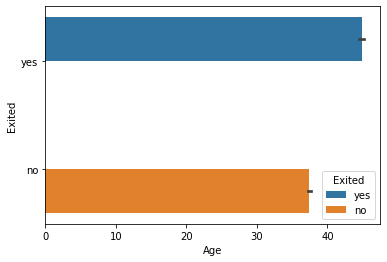

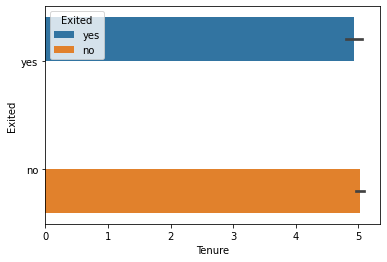

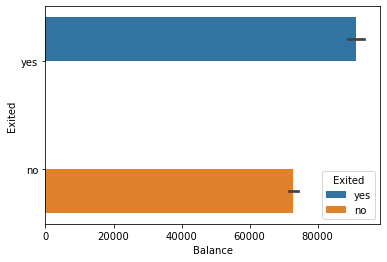

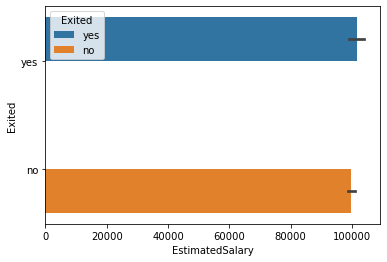

In [23]:
for a in num_cols:
    sns.barplot(data=df, y = 'Exited', x = a, hue='Exited')
    plt.show()

In [24]:
cat_cols = (df.select_dtypes(['object']).columns)
cat_cols

Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Exited'],
      dtype='object')

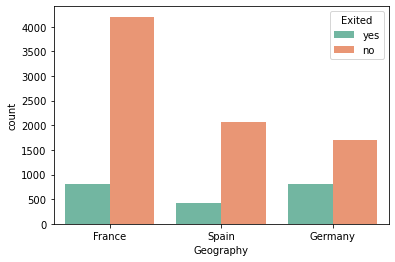

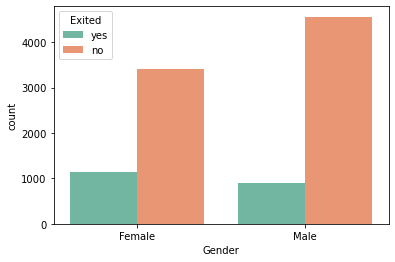

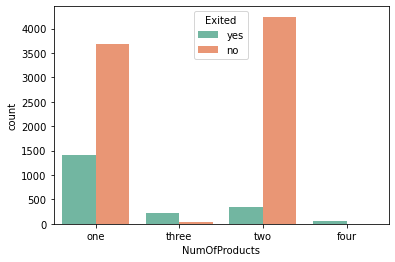

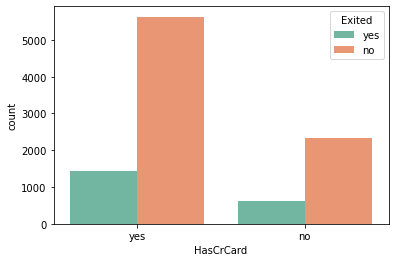

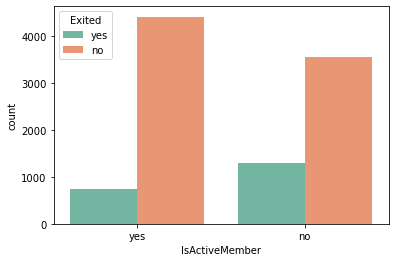

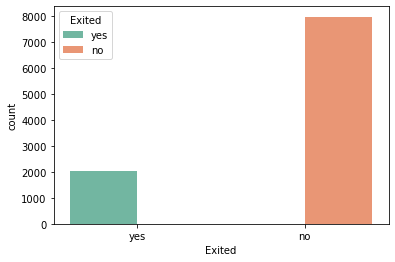

In [25]:
for a in cat_cols:
    sns.countplot(df[a], hue = df["Exited"], palette= "Set2")
    plt.show()

<AxesSubplot:>

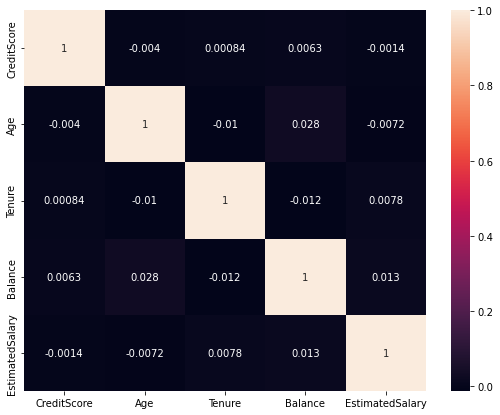

In [26]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot = True)

In [27]:
# in this data set there is no strong correlation.

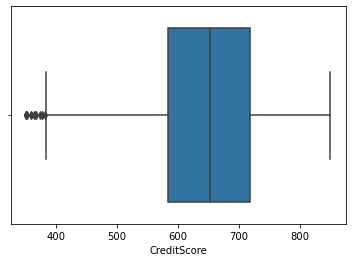

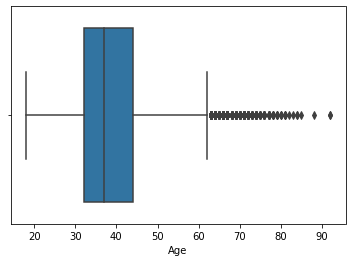

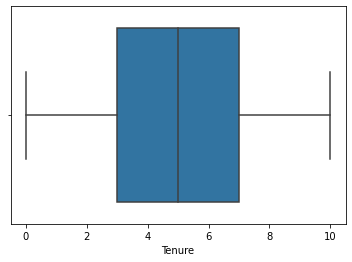

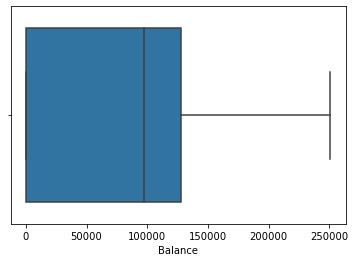

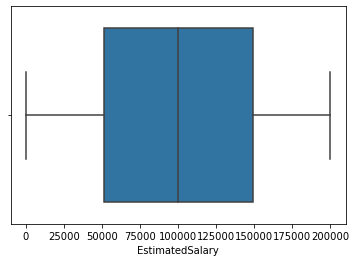

In [28]:
## for outlier checking

for a in num_cols:
    sns.boxplot(df[a])
    plt.show()

In [29]:
## here only age has outlier but we to keep it as it obvious that age has some outliers.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


#### OUR DATA HAS NO MISSING VALUES , BUT IF WE HAVE MISSING VALUE IT CAN BE SOLVED BY IMPUTATION LIKE KNN , ITERAIVE ETC.

## FEATURE ENGINEERING

In [31]:
df["Geography"].unique() ## this is nominal type so we will use one hot encoding.

array(['France', 'Spain', 'Germany'], dtype=object)

In [32]:
df_geo = pd.get_dummies(df["Geography"], prefix = "geo_", drop_first = True)
df_geo

,geo__Germany,geo__Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [33]:
df["Gender"].unique()## this is nominal type so we will use one hot encoding.

array(['Female', 'Male'], dtype=object)

In [34]:
df_gender = pd.get_dummies(df["Gender"], prefix = "gender_", drop_first = True)
df_gender

,gender__Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [35]:
df["NumOfProducts"].unique()

array(['one', 'three', 'two', 'four'], dtype=object)

In [36]:
df_prod = pd.get_dummies(df["NumOfProducts"], prefix = "product_", drop_first = True)
df_prod

,product__one,product__three,product__two
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
9995,0,0,1
9996,1,0,0
9997,1,0,0
9998,0,0,1


In [37]:
df["HasCrCard"].unique()

array(['yes', 'no'], dtype=object)

In [38]:
df_cred = pd.get_dummies(df["HasCrCard"], prefix = "credit_", drop_first = True)
df_cred

,credit__yes
0,1
1,0
2,1
3,0
4,1
...,...
9995,1
9996,1
9997,0
9998,1


In [39]:
df["IsActiveMember"].unique()

array(['yes', 'no'], dtype=object)

In [40]:
df_active = pd.get_dummies(df["IsActiveMember"], prefix = "active_", drop_first = True)
df_active

,active__yes
0,1
1,1
2,0
3,0
4,1
...,...
9995,0
9996,1
9997,1
9998,0


In [41]:
df["Exited"].unique()

array(['yes', 'no'], dtype=object)

In [42]:
df_exit = pd.get_dummies(df["Exited"], prefix = "exited_", drop_first = True)
df_exit

,exited__yes
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [43]:
df_new = pd.concat([df, df_geo, df_active, df_cred, df_gender, df_prod,df_exit],axis = 1)
df_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo__Germany,geo__Spain,active__yes,credit__yes,gender__Male,product__one,product__three,product__two,exited__yes
0,619,France,Female,42,2,0.00,one,yes,yes,101348.88,yes,0,0,1,1,0,1,0,0,1
1,608,Spain,Female,41,1,83807.86,one,no,yes,112542.58,no,0,1,1,0,0,1,0,0,0
2,502,France,Female,42,8,159660.80,three,yes,no,113931.57,yes,0,0,0,1,0,0,1,0,1
3,699,France,Female,39,1,0.00,two,no,no,93826.63,no,0,0,0,0,0,0,0,1,0
4,850,Spain,Female,43,2,125510.82,one,yes,yes,79084.10,no,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,two,yes,no,96270.64,no,0,0,0,1,1,0,0,1,0
9996,516,France,Male,35,10,57369.61,one,yes,yes,101699.77,no,0,0,1,1,1,1,0,0,0
9997,709,France,Female,36,7,0.00,one,no,yes,42085.58,yes,0,0,1,0,0,1,0,0,1
9998,772,Germany,Male,42,3,75075.31,two,yes,no,92888.52,yes,1,0,0,1,1,0,0,1,1


In [44]:
df_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo__Germany,geo__Spain,active__yes,credit__yes,gender__Male,product__one,product__three,product__two,exited__yes
0,619,France,Female,42,2,0.00,one,yes,yes,101348.88,yes,0,0,1,1,0,1,0,0,1
1,608,Spain,Female,41,1,83807.86,one,no,yes,112542.58,no,0,1,1,0,0,1,0,0,0
2,502,France,Female,42,8,159660.80,three,yes,no,113931.57,yes,0,0,0,1,0,0,1,0,1
3,699,France,Female,39,1,0.00,two,no,no,93826.63,no,0,0,0,0,0,0,0,1,0
4,850,Spain,Female,43,2,125510.82,one,yes,yes,79084.10,no,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,two,yes,no,96270.64,no,0,0,0,1,1,0,0,1,0
9996,516,France,Male,35,10,57369.61,one,yes,yes,101699.77,no,0,0,1,1,1,1,0,0,0
9997,709,France,Female,36,7,0.00,one,no,yes,42085.58,yes,0,0,1,0,0,1,0,0,1
9998,772,Germany,Male,42,3,75075.31,two,yes,no,92888.52,yes,1,0,0,1,1,0,0,1,1


In [45]:
df_new.drop(["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"], axis = True, inplace = True)
df_new

,CreditScore,Age,Tenure,Balance,EstimatedSalary,geo__Germany,geo__Spain,active__yes,credit__yes,gender__Male,product__one,product__three,product__two,exited__yes
0,619,42,2,0.00,101348.88,0,0,1,1,0,1,0,0,1
1,608,41,1,83807.86,112542.58,0,1,1,0,0,1,0,0,0
2,502,42,8,159660.80,113931.57,0,0,0,1,0,0,1,0,1
3,699,39,1,0.00,93826.63,0,0,0,0,0,0,0,1,0
4,850,43,2,125510.82,79084.10,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,96270.64,0,0,0,1,1,0,0,1,0
9996,516,35,10,57369.61,101699.77,0,0,1,1,1,1,0,0,0
9997,709,36,7,0.00,42085.58,0,0,1,0,0,1,0,0,1
9998,772,42,3,75075.31,92888.52,1,0,0,1,1,0,0,1,1


In [46]:
df_new.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'geo__Germany', 'geo__Spain', 'active__yes', 'credit__yes',
       'gender__Male', 'product__one', 'product__three', 'product__two',
       'exited__yes'],
      dtype='object')

## CREATING DEPENDENT AND INDEPENDENT DATASETS

In [47]:
x = df_new.drop(["exited__yes"],axis = 1)
y = df_new["exited__yes"]

## HANDLING IMBALANCED DATA

In [48]:
y.value_counts()

0    7963
1    2037
Name: exited__yes, dtype: int64

In [49]:
2037/7963 ## the ratio is below the acceptance limit.

0.25580811252040686

In [50]:
## applying synthetic minority oversampling technique.


In [51]:
smote = SMOTE(sampling_strategy = 0.8)
x_smote, y_smote = smote.fit_resample(x,y)

In [52]:
y_smote.value_counts()

0    7963
1    6370
Name: exited__yes, dtype: int64

In [53]:
6370/7963   ### now the data is balanced


0.7999497676754992

## FEATURE SELECTION

In [54]:
# 1) correlation method  --- filter method

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [55]:
corr_features = correlation(x_smote,0.6)
corr_features

{'product__two'}

In [56]:
### here all correlation are under limits except column product_two , now you can drop that column .

In [57]:
## 2) forward propagation --- wrapper method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [58]:
knn = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn, direction = "forward", n_features_to_select = 10)

In [59]:
sfs.fit(x_smote, y_smote)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=10)

In [60]:
array =sfs.get_support()
s1 = pd.Series(array, index=x_smote.columns)
s1

CreditScore        False
Age                 True
Tenure              True
Balance            False
EstimatedSalary    False
geo__Germany        True
geo__Spain          True
active__yes         True
credit__yes         True
gender__Male        True
product__one        True
product__three      True
product__two        True
dtype: bool

In [61]:
## here we get top 10 features .

In [62]:
## 3) extratree classifiers --- embedded method

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
tree_model = ExtraTreesClassifier()
tree_model.fit(x_smote, y_smote)

ExtraTreesClassifier()

In [65]:
print(tree_model.feature_importances_)

[0.09005645 0.16679862 0.06951907 0.09555246 0.09712568 0.01345408
 0.02514722 0.09659772 0.01757969 0.05876447 0.06695676 0.00761886
 0.19482891]


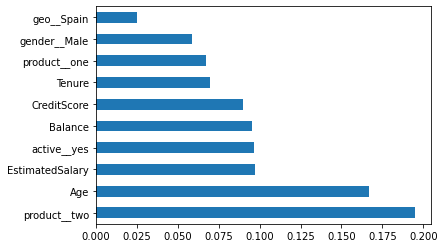

In [66]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(tree_model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [67]:
## this are top 10 features.

## CREATING TRAINING AND TESTING DATA SETS

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 111 )

## MODEL TRAINING

In [69]:
algo_name = []
accuracy = []
def models(model):
    score = cross_val_score(model, x_smote, y_smote, scoring = "accuracy", cv = 5)
    algo_name.append(model)
    accuracy.append((score).mean())
    print(model)
    print(score)
    print('-'*100) 

In [70]:
model_list = [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), AdaBoostClassifier(), 
              DecisionTreeClassifier()]

In [71]:
for a in model_list:
    print(a)

RandomForestClassifier()
KNeighborsClassifier()
LogisticRegression()
AdaBoostClassifier()
DecisionTreeClassifier()


In [72]:
for a in model_list:
    models(a)

RandomForestClassifier()
[0.77153819 0.83048483 0.91768399 0.9162596  0.914515  ]
----------------------------------------------------------------------------------------------------
KNeighborsClassifier()
[0.66236484 0.65783048 0.68259505 0.68143754 0.70481507]
----------------------------------------------------------------------------------------------------
LogisticRegression()
[0.65504011 0.6564353  0.66096965 0.66120028 0.6615492 ]
----------------------------------------------------------------------------------------------------
AdaBoostClassifier()
[0.75305197 0.81374259 0.89047785 0.89637125 0.88799721]
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
[0.73561214 0.78060691 0.85734217 0.86915562 0.86217725]
----------------------------------------------------------------------------------------------------


In [73]:
acc = pd.DataFrame({"Algorithm":algo_name, "Accuracy":accuracy})
acc = acc.sort_values(by = 'Accuracy', ascending = False, ignore_index = True)
acc

,Algorithm,Accuracy
0,RandomForestClassifier(),0.870096
1,AdaBoostClassifier(),0.848328
2,DecisionTreeClassifier(),0.820979
3,KNeighborsClassifier(),0.677809
4,LogisticRegression(),0.659039


In [74]:
## here we are getting maximum accuracy for random forest so we will select random forest for our model.

In [75]:
random_model = RandomForestClassifier()
random_model.fit(x_train, y_train)

RandomForestClassifier()

## FOR TESTING DATA

Accuracy score:
0.8719916288803627
----------------------------------------
Confusion Matrix:
[[1427  157]
 [ 210 1073]]
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1584
           1       0.87      0.84      0.85      1283

    accuracy                           0.87      2867
   macro avg       0.87      0.87      0.87      2867
weighted avg       0.87      0.87      0.87      2867



<AxesSubplot:>

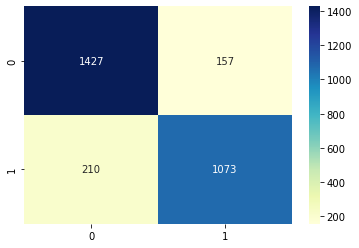

In [76]:
y_pred = random_model.predict(x_test)

print ('Accuracy score:')
print (accuracy_score(y_test,y_pred))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_pred))
print ('-'*40)
print ('Classification report:')
print (classification_report(y_test,y_pred))
diag = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(diag), annot=True, cmap="YlGnBu" ,fmt='g')

## FOR TRAINING DATA

Accuracy score:
1.0
----------------------------------------
Confusion Matrix:
[[6379    0]
 [   0 5087]]
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6379
           1       1.00      1.00      1.00      5087

    accuracy                           1.00     11466
   macro avg       1.00      1.00      1.00     11466
weighted avg       1.00      1.00      1.00     11466



<AxesSubplot:>

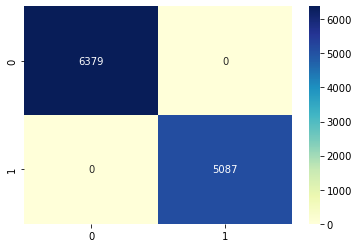

In [77]:
y_train_pred = random_model.predict(x_train)

print ('Accuracy score:')
print (accuracy_score(y_train,y_train_pred))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_train,y_train_pred))
print ('-'*40)
print ('Classification report:')
print (classification_report(y_train,y_train_pred))
diag = confusion_matrix(y_train, y_train_pred)
sns.heatmap(pd.DataFrame(diag), annot=True, cmap="YlGnBu" ,fmt='g')

In [78]:
## here we can see that our model is overfitting so we can do hyperparametr tuning.

## HYPERPARAMETER TUNING

In [79]:
# random_model = RandomForestClassifier()
# hyp = ({"n_estimators" : np.arange(1,200),
#     "criterion" : ["gini", "entropy"],
#     "max_depth" : np.arange(1,20), 
#     "min_samples_split" : np.arange(2,20),
#     "min_samples_leaf" : np.arange(1,10)})
# #     "max_features":["sqrt", "log2"]})

In [80]:
# gs_random_model = GridSearchCV(random_model, hyp, cv = 3)
# gs_random_model.fit(x_train, y_train)

In [81]:
# gs_random_model.best_params_

## TESTING AFTER HYPERPARAMETR TUNING

In [82]:
random_model = RandomForestClassifier()
random_model.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
y_pred = random_model.predict(x_test)

print ('Accuracy score:')
print (accuracy_score(y_test,y_pred))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_pred))
print ('-'*40)
print ('Classification report:')
print (classification_report(y_test,y_pred))

Accuracy score:
0.8747820020927799
----------------------------------------
Confusion Matrix:
[[1428  156]
 [ 203 1080]]
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1584
           1       0.87      0.84      0.86      1283

    accuracy                           0.87      2867
   macro avg       0.87      0.87      0.87      2867
weighted avg       0.87      0.87      0.87      2867



## ROC AUC SCORE AND ROC CURVE  

In [84]:
model_list

[RandomForestClassifier(),
 KNeighborsClassifier(),
 LogisticRegression(),
 AdaBoostClassifier(),
 DecisionTreeClassifier()]

In [85]:
def model_optimun(model):
    model_name=model
    print(model_name,"\n")
    model.fit(x_train, y_train)
    y_train_pred = model.predict_proba(x_train)
    print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
    y_test_pred = model.predict_proba(x_test)
    print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))
    print('-'*100)
    print('-'*100)

In [86]:
for a in model_list:
    model_optimun(a)

RandomForestClassifier() 

RF train roc-auc: 1.0
RF test roc-auc: 0.9438672579261043
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
KNeighborsClassifier() 

RF train roc-auc: 0.8700686900417451
RF test roc-auc: 0.734925246226883
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
LogisticRegression() 

RF train roc-auc: 0.7128846609517981
RF test roc-auc: 0.7175988253540866
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
AdaBoostClassifier() 

RF train roc-auc: 0.9265110944776441
RF test roc-auc: 0.930208161112292
---------------------

## ROC CURVE

In [87]:
y_pred_prob= random_model.predict_proba(x_test)
y_pred_prob

array([[0.1 , 0.9 ],
       [0.02, 0.98],
       [0.64, 0.36],
       ...,
       [0.17, 0.83],
       [0.48, 0.52],
       [0.04, 0.96]])

In [88]:
fpr , tpr, thresh = roc_curve(y_test, y_pred_prob[:,1])

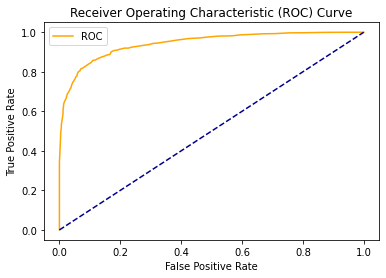

In [89]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()